# Importing libraries 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import the data through Pandas module 

In [3]:
data = pd.read_csv("Users/martinaguerrieri/Desktop/advertising.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### We want to look at the data structure to go ahead with the analysis, and so first we want to know how many rows and columns we have. Then after that we use the describe() function that returns informations and descriptions of the data frame.

In [68]:
data.shape


(200, 4)

In [70]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### At the beginning of every analysis is very important also to find, if there are, some missing values or if we have null data and group them together.

#### And after we cleaned the data, it’s clear that the data frame is clean and doesn’t contain any missing or null values .

In [10]:
missing_data = data.isnull()
missing_data.head()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [13]:
for column in list(missing_data.columns):
    print(column)
    print(missing_data[column].value_counts())

TV
False    200
Name: TV, dtype: int64
Radio
False    200
Name: Radio, dtype: int64
Newspaper
False    200
Name: Newspaper, dtype: int64
Sales
False    200
Name: Sales, dtype: int64


# Exploring relationships with plots  and correlation number between Sales and every Campaign




### The plot between TV campaign and Sales shows that they have a linear relationship.

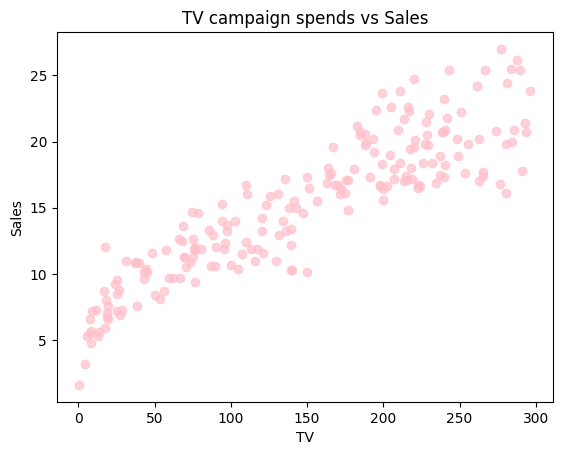

In [36]:
plt.scatter(x=data['TV'], y=data['Sales'], color = "pink", alpha = 0.7)
plt.title('TV campaign spends vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#### The plot between Radio and Sales shows that they have a non-linear relationship

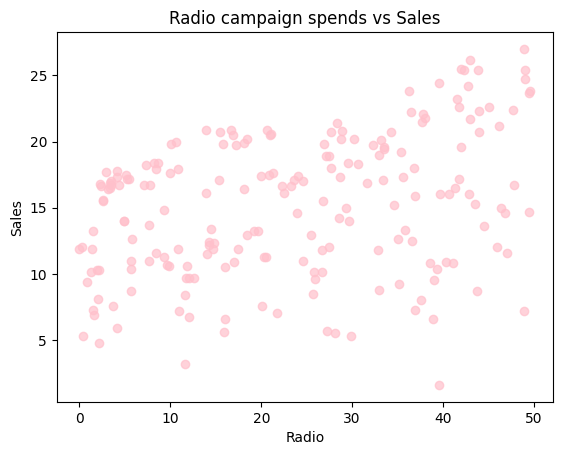

In [37]:
plt.scatter(x=data['Radio'], y=data['Sales'],color = "pink", alpha = 0.7)
plt.title('Radio campaign spends vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

#### The plot between Newspaper and Sales shows that they have a non - linear relationship

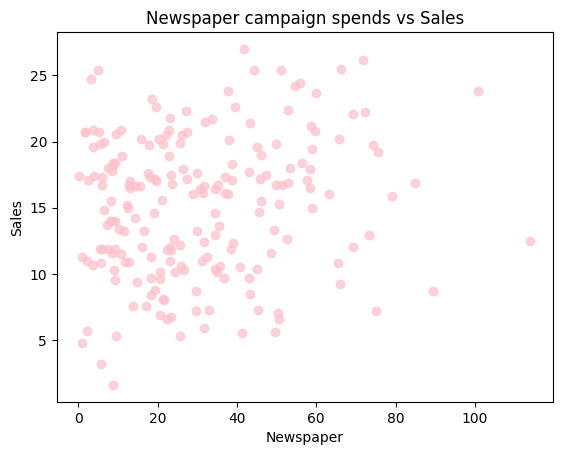

In [39]:
plt.scatter(x=data['Newspaper'], y=data['Sales'], color = "pink", alpha = 0.7)
plt.title('Newspaper campaign spends vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()



# Correlation

### After the visualization part, that is essential, we need to look at the strength relationship by Correlation - we calculate the  Pearson correlation coefficient by default, which measures the linear relationship between two variables.  df.corr()
### I really like to see them in a Data Frame before to analize them in specific, just to have a general idea of what I’m gonna get it. 


####  We clearly see that the : 
- `TV` has a **very strong relationship with the campaign**  `Sales`
- `Radio` has a **weak positive relationship with the campaign** `Sales`
- `Newspaper` has a **weak positive relationship with the campaign** `Sales`


In [52]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [58]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [75]:
np.corrcoef(data['TV'], data['Sales'])


array([[1.        , 0.90120791],
       [0.90120791, 1.        ]])

In [53]:
np.corrcoef(data['Radio'], data['Sales'])

array([[1.       , 0.3496311],
       [0.3496311, 1.       ]])

In [76]:
np.corrcoef(data['Newspaper'], data['Sales'])

array([[1.        , 0.15796003],
       [0.15796003, 1.        ]])

#### Then we use the Seaborn module to plot the correlation 



#### - Immediately we notice that TV campaign and Sales are highly correlated, but Newspaper and Radio campaign have a weak correlation with the Sales.

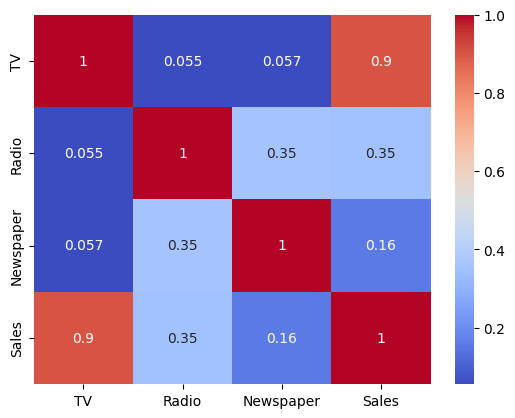

In [63]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

# P - value

#### > The P-value is a statistical measure that measure the probability of observing the results we got (or more extreme results) just by chance, given that the null hypothesis is true.
 
#### > Helps us to determine whether the results of a statistical test are significant or not, if the P-value is less than or equal to a significance level (usually denoted by alpha and set to 0.05), we reject the null hypothesis and conclude that there is evidence against it.



# Hypothesis:

#### - Ho =  There’s a linear relationship between TV / Radio / Newspaper campaign and Sales
#### - Ha = There's no liner relationship betwee TV / Radio / Newspaper campaign and Sales 
#### - SIGNIFICANCE LEVEL = 0.05




### We calculate our P-value for: 
#### 
- `TV` - considering that the P-value is < 0.05, the correlation is statistically significant and the linear relationship is very strong.  `0.901208`
- `Radio` - considering that the P-Value is < 0.05, the correlation is statistically significant and the linear relationship is not very strong.  `0.349361`
- `Newspaper` - considering that the P-Value is < 0.05, the correlation is statistically significant and the linear relationship is very weak.  `0.157960`


In [64]:
pearson_coef, p_value = stats.pearsonr(data['TV'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a Pvalue of P = {p_value}")

The Pearson Correlation Coefficient is 0.9012079133023307 with a p_value of P = 7.927911625321269e-74


In [65]:
pearson_coef, p_value = stats.pearsonr(data['Radio'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a Pvalue of = {p_value}")

The Pearson Correlation Coefficient is 0.3496310970076691 with a p_value of P = 3.882892364494227e-07


In [66]:
pearson_coef, p_value = stats.pearsonr(data['Newspaper'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a Pvalue of = {p_value}")

The Pearson Correlation Coefficient is 0.15796002615492627 with a p_value of P = 0.025487444306997908


# Discuss the possibility of Correlation, Causation or both between the individual features and the Sales.

#### The analysis and results suggest that there is a correlation between the individual campaigns and the sales figures. The radio and newspaper campaigns have a weaker correlation than the TV campaign and the sales figures. This indicates that spending money on a TV advertising campaign is more likely to result in a direct increase in sales. However, this does not necessarily mean that there is a causation between the two variables. Further analysis through A/B testing or other methods is necessary to determine the causal relationship.